In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [65]:
train_x = np.linspace(0,100,100)
# get the corresponding y values for the training x samples. We add a noise to the y values 
train_y = train_x**2 #+ np.random.random(len(train_samples_x))

In [66]:
# # my model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [67]:
loss = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=300, restore_best_weights=True)

model2.compile(optimizer=optimizer, loss=loss, metrics=tf.metrics.RootMeanSquaredError())
model2.fit(tf.expand_dims(train_x, -1), train_y, epochs=2000, verbose=1, callbacks=[early_stop])

Epoch 1/2000
4/4 [==============================] - 1s 4ms/step - loss: 19983930.0000 - root_mean_squared_error: 4470.3389
Epoch 2/2000
4/4 [==============================] - 0s 4ms/step - loss: 17487998.0000 - root_mean_squared_error: 4181.8652
Epoch 3/2000
4/4 [==============================] - 0s 5ms/step - loss: 10454170.0000 - root_mean_squared_error: 3233.2908
Epoch 4/2000
4/4 [==============================] - 0s 8ms/step - loss: 1694332.1250 - root_mean_squared_error: 1301.6652
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 4063171.5000 - root_mean_squared_error: 2015.7310
Epoch 6/2000
4/4 [==============================] - 0s 5ms/step - loss: 1490299.2500 - root_mean_squared_error: 1220.7781
Epoch 7/2000
4/4 [==============================] - 0s 5ms/step - loss: 2122730.0000 - root_mean_squared_error: 1456.9591
Epoch 8/2000
4/4 [==============================] - 0s 9ms/step - loss: 1995555.0000 - root_mean_squared_error: 1412.6411
Epoch 9/2000
4/4 [===

1/1 [==============================] - 0s 19ms/step


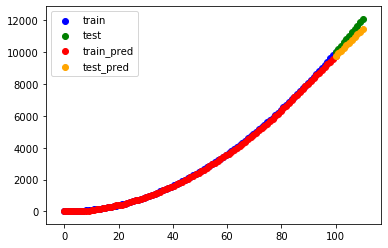

In [72]:
train_pred = model2.predict(train_x)

test_x = np.linspace(100,110,11)
test_y = test_x**2
test_pred = model2.predict(test_x)


plt.scatter(train_x, train_y, c='blue', label='train')
plt.scatter(test_x, test_y, c='green', label='test')
plt.scatter(train_x, train_pred, c='red', label='train_pred')
plt.scatter(test_x, test_pred, c='orange', label='test_pred')
plt.legend()
plt.show()